In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [32]:
mat_file = "../data/student-mat.csv"
por_file = "../data/student-por.csv"

In [33]:
mat_df = pd.read_csv(mat_file, sep=";")
por_df = pd.read_csv(por_file, sep=";")

print(mat_df.head(10))

print(por_df.head(10))

  school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3        6   5   6   6  
1  ...  

In [34]:
mat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [35]:
por_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [36]:
print("Math df describe")
print(mat_df.describe())
print()
print("Portugal df describe")
print(por_df.describe())

Math df describe
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0

In [37]:
# Check for missing values
print(mat_df.isnull().sum())
print(por_df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health     

In [38]:
def show_heatmap(df):
    # Setting style for the plots
    sns.set_theme(style="whitegrid")
    
    # Numeric Data Statistics and Correlation
    print('-' * 40, '\nPearson\'s Correlation Heatmap\n', '-' * 40)
    plt.figure(figsize=(15, 10))
    corr = df.select_dtypes(include=np.number).corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(220, 20, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75},
                annot_kws={"size": 10}, fmt='.2f')
    plt.title('Correlation Matrix', fontsize=18)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    plt.show()

---------------------------------------- 
Pearson's Correlation Heatmap
 ----------------------------------------


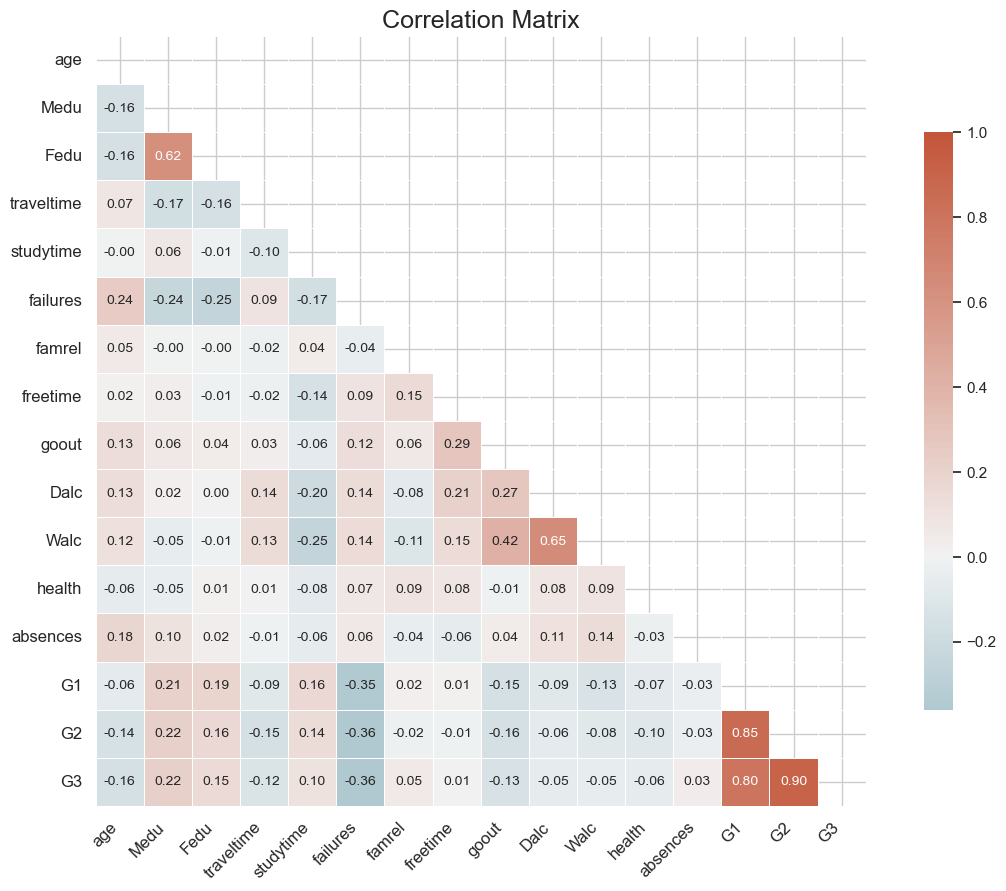

In [39]:
show_heatmap(mat_df)

---------------------------------------- 
Pearson's Correlation Heatmap
 ----------------------------------------


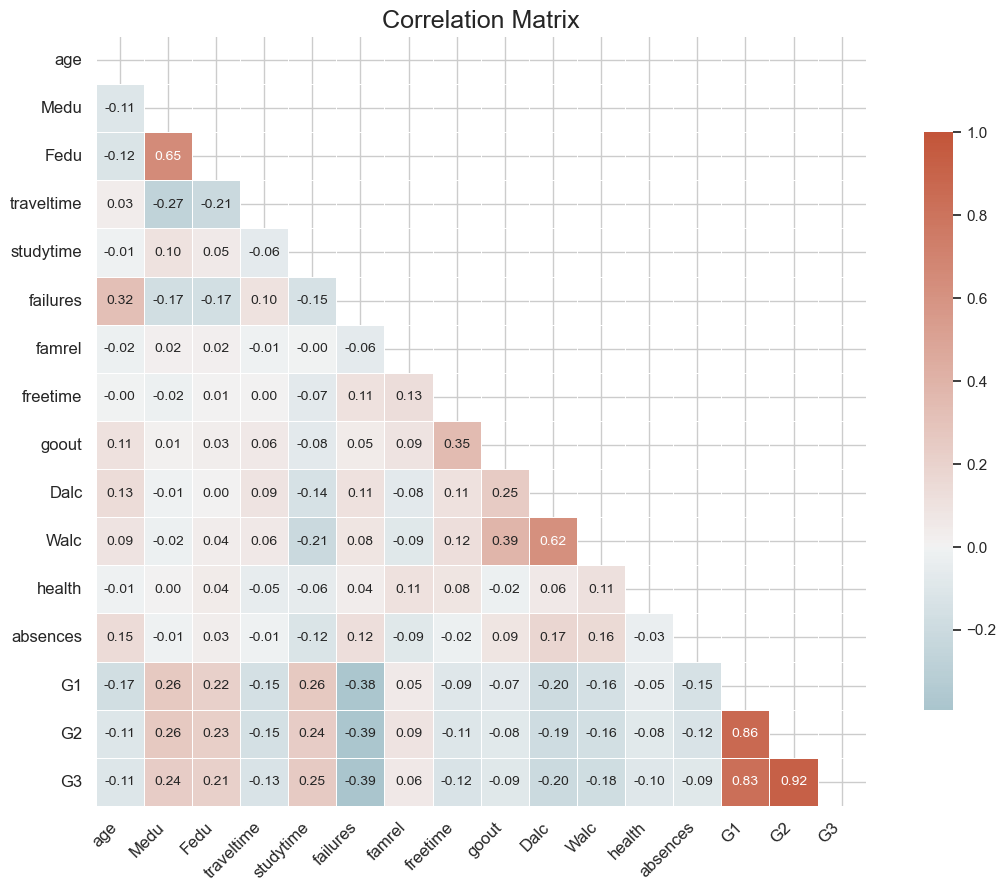

In [40]:
show_heatmap(por_df)

In [41]:
#creating catagorical columns list and numeric columns list
cat_columns = ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian',
                'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

num_columns = ['Medu','Fedu','traveltime','studytime','famrel','freetime','goout','Dalc','Walc','health']
cont_columns = ['age','failures','absences','G1','G2','G3']

In [42]:
def ncols_calculator(cols, nrows=3):
    '''
    Takes a list of columns and number of rows for plots
    
    Returns the number of cols to be used in matplotlib.pyplot.subplots()
    and how many axes will be left that need to be deleted
    '''
    n = len(cols)
    ncols = n // nrows
    if ncols * nrows < n:
        ncols += 1
    axdel = ncols * nrows - n
    return ncols, axdel

def bar_matrix(df, cols, nrows=3, annot=True, title='You Forget Your Title!'):
    '''
    df --> DataFrame
    cols --> List of Column names to be plotted
    nrows --> number of rows to split figure subplots, default is 3
    annot --> Boolean to decide whether percentage of each bar annotation is desired
    title --> Figure title to be displayed
    
    Function is designed to create one plot using sns.countplot for categorical columns
    '''
    ncols, axdel = ncols_calculator(cols, nrows)
    fig, axes = plt.subplots(ncols, nrows, figsize=(nrows * 5, ncols * 4), constrained_layout=True)
    plt.suptitle(title, size=22, fontweight='bold', fontfamily='serif')
    axes = axes.ravel()
    
    if axdel > 0:
        for ax in range(1, axdel + 1):
            axes[-ax].remove()
            
    for i in range(len(cols)):
        ax = axes[i]
        col = cols[i]
        sns.countplot(x=col, data=df, hue=col, palette='viridis', ax=ax, legend=False)
        ax.set_xlabel("")
        ax.set_ylabel("Count", fontsize=12)
        ax.set_title(f'{col} Distribution', fontsize=14, fontweight='bold')
        ax.set_ylim(0, max(ax.get_ylim()) + max(ax.get_ylim()) / 8)
        
        if annot:
            for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_height() / df.shape[0])
                x = p.get_x() + p.get_width() / 2
                y = p.get_height() + (max(ax.get_ylim()) / 100)
                ax.annotate(percentage, (x, y), ha='center', fontsize=10, color='black')
                

def hist_bar(df, cols, title='Distribution of Continuous Features'):
    '''
    df --> DataFrame
    cols --> List of Column names to be plotted
    title --> Figure title to be displayed
    
    Function is designed to create histograms for continuous columns
    '''
    ncols = len(cols)
    fig, axes = plt.subplots(ncols, 1, figsize=(12, 6 * ncols), constrained_layout=True)
    fig.suptitle(title, size=20, fontweight='bold', fontfamily='serif')
    
    for i, col in enumerate(cols):
        # Histogram
        ax = axes[i]
        sns.histplot(df[col], kde=True, color='#00755E', ax=ax)
        ax.set_title(f'{col} Distribution', fontsize=14, fontweight='bold', pad=20)
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel("Frequency", fontsize=12)  

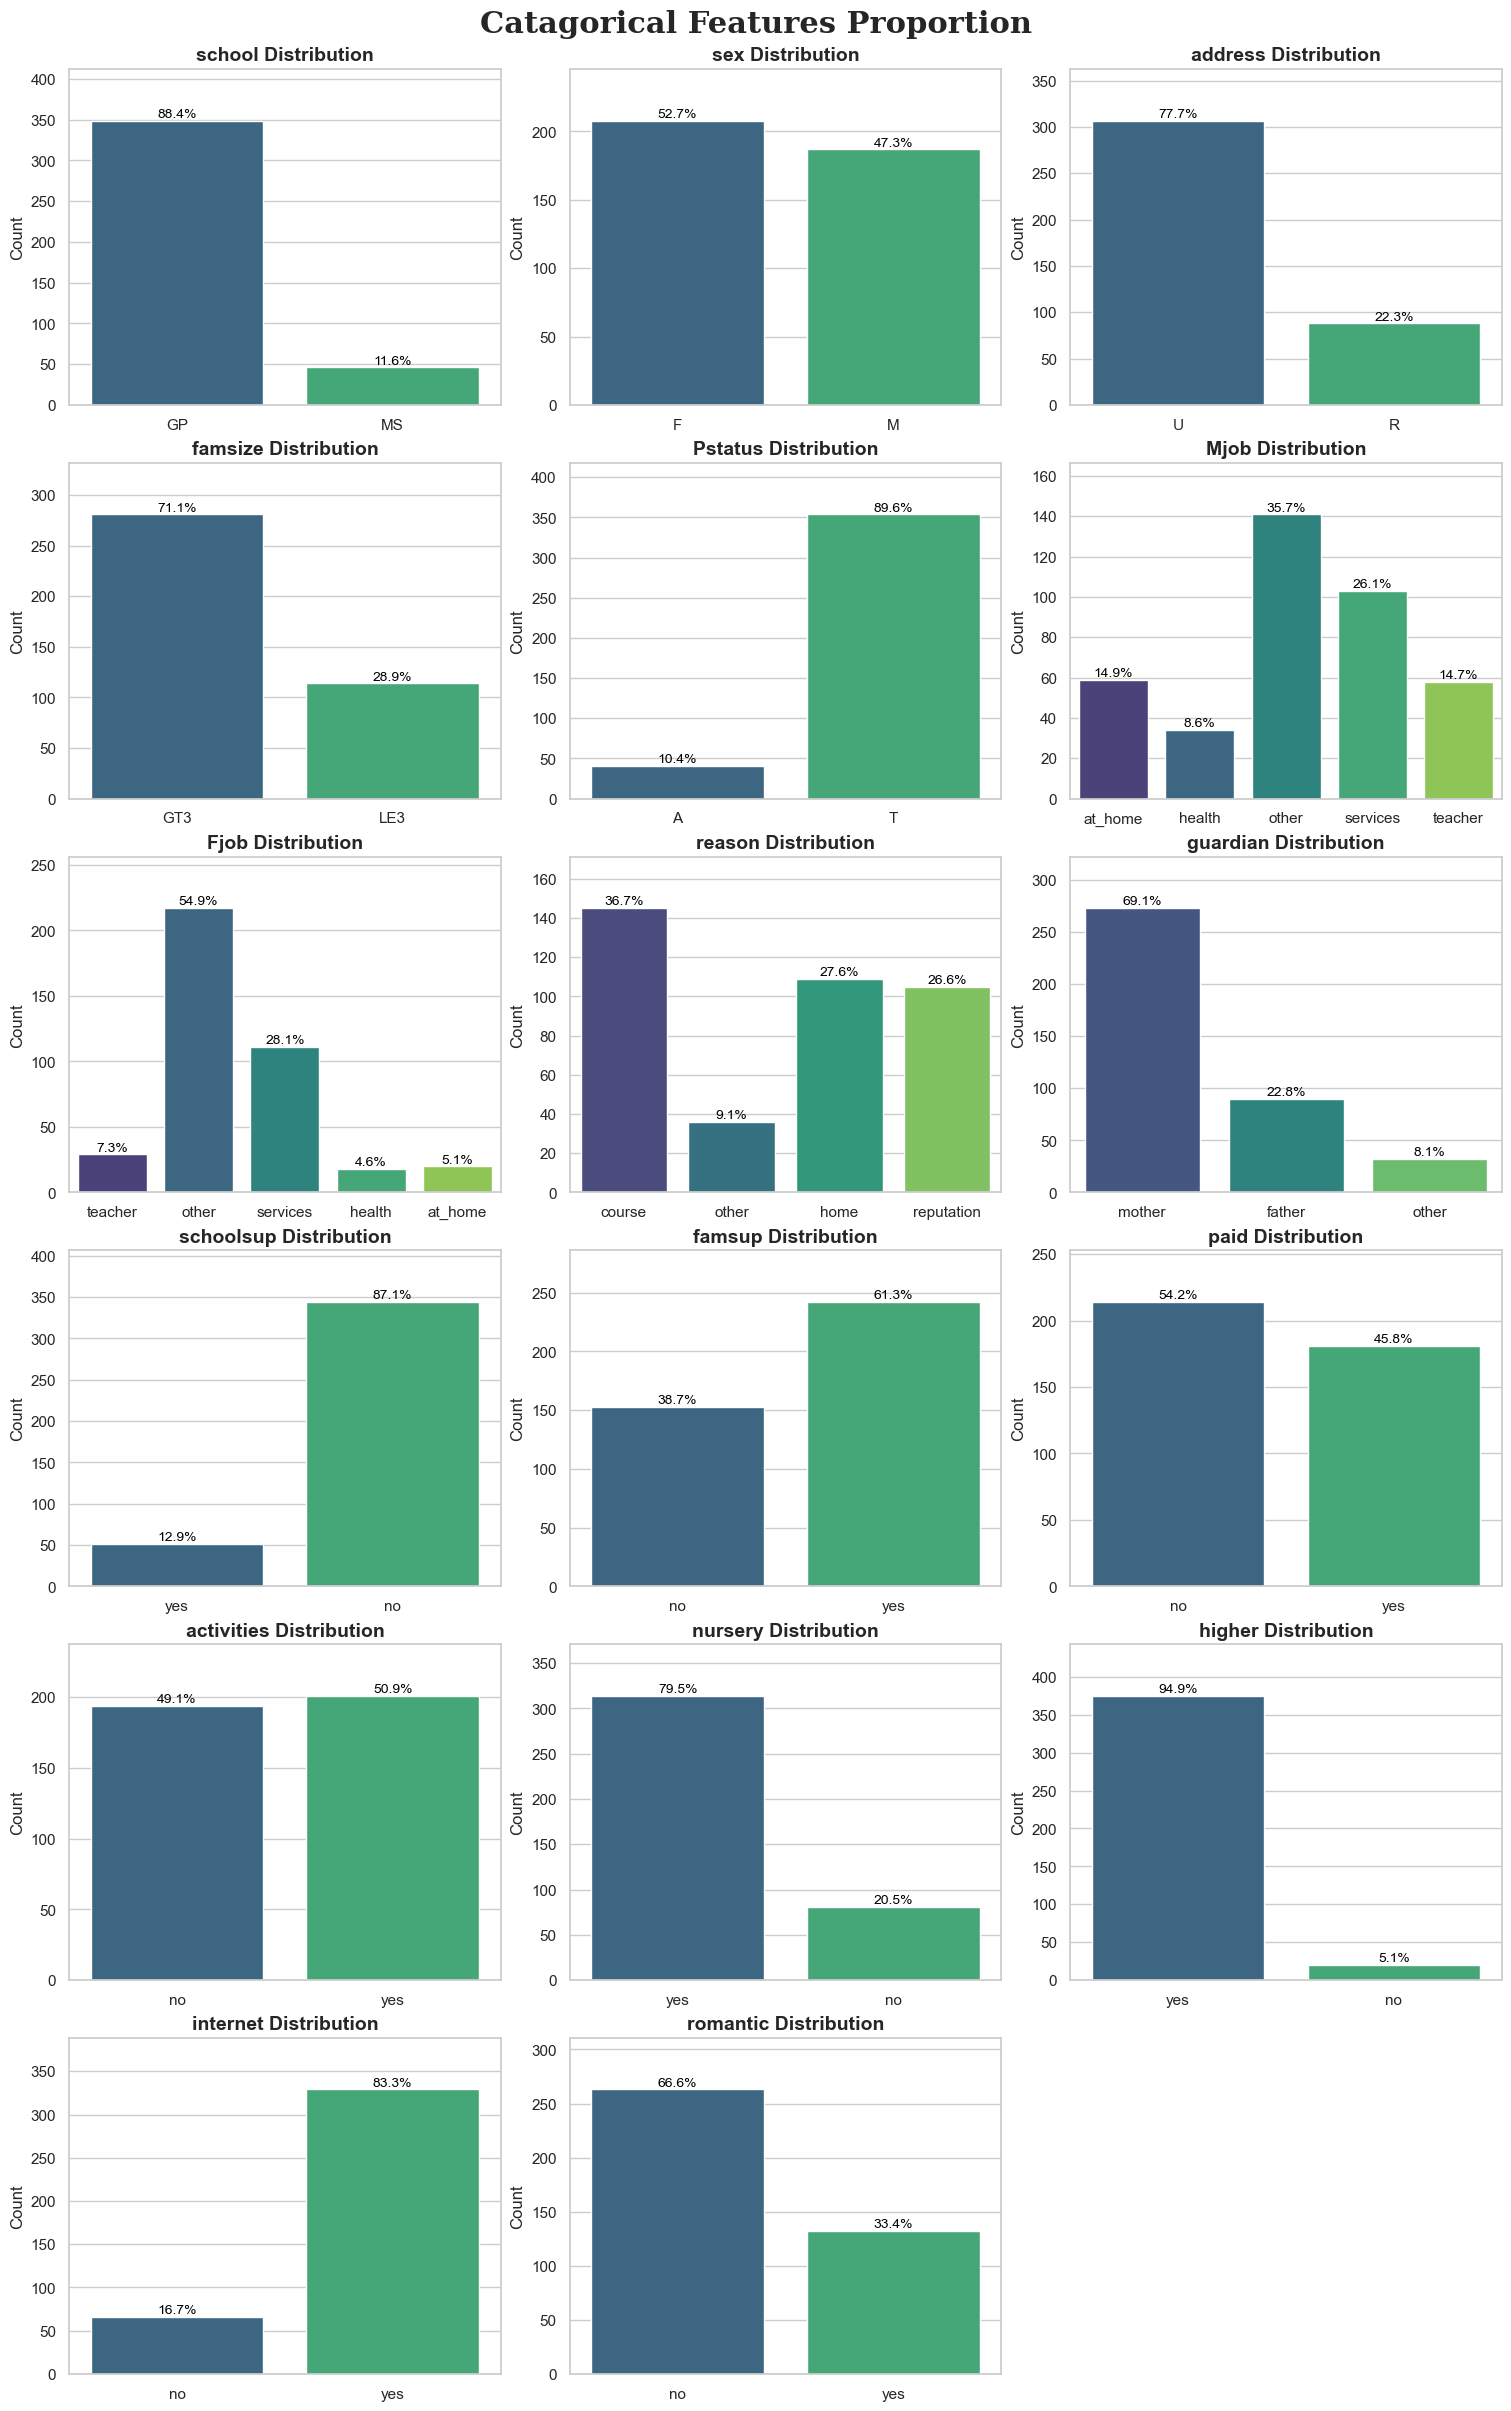

In [43]:
bar_matrix(mat_df,cat_columns,annot=True,title='Catagorical Features Proportion')

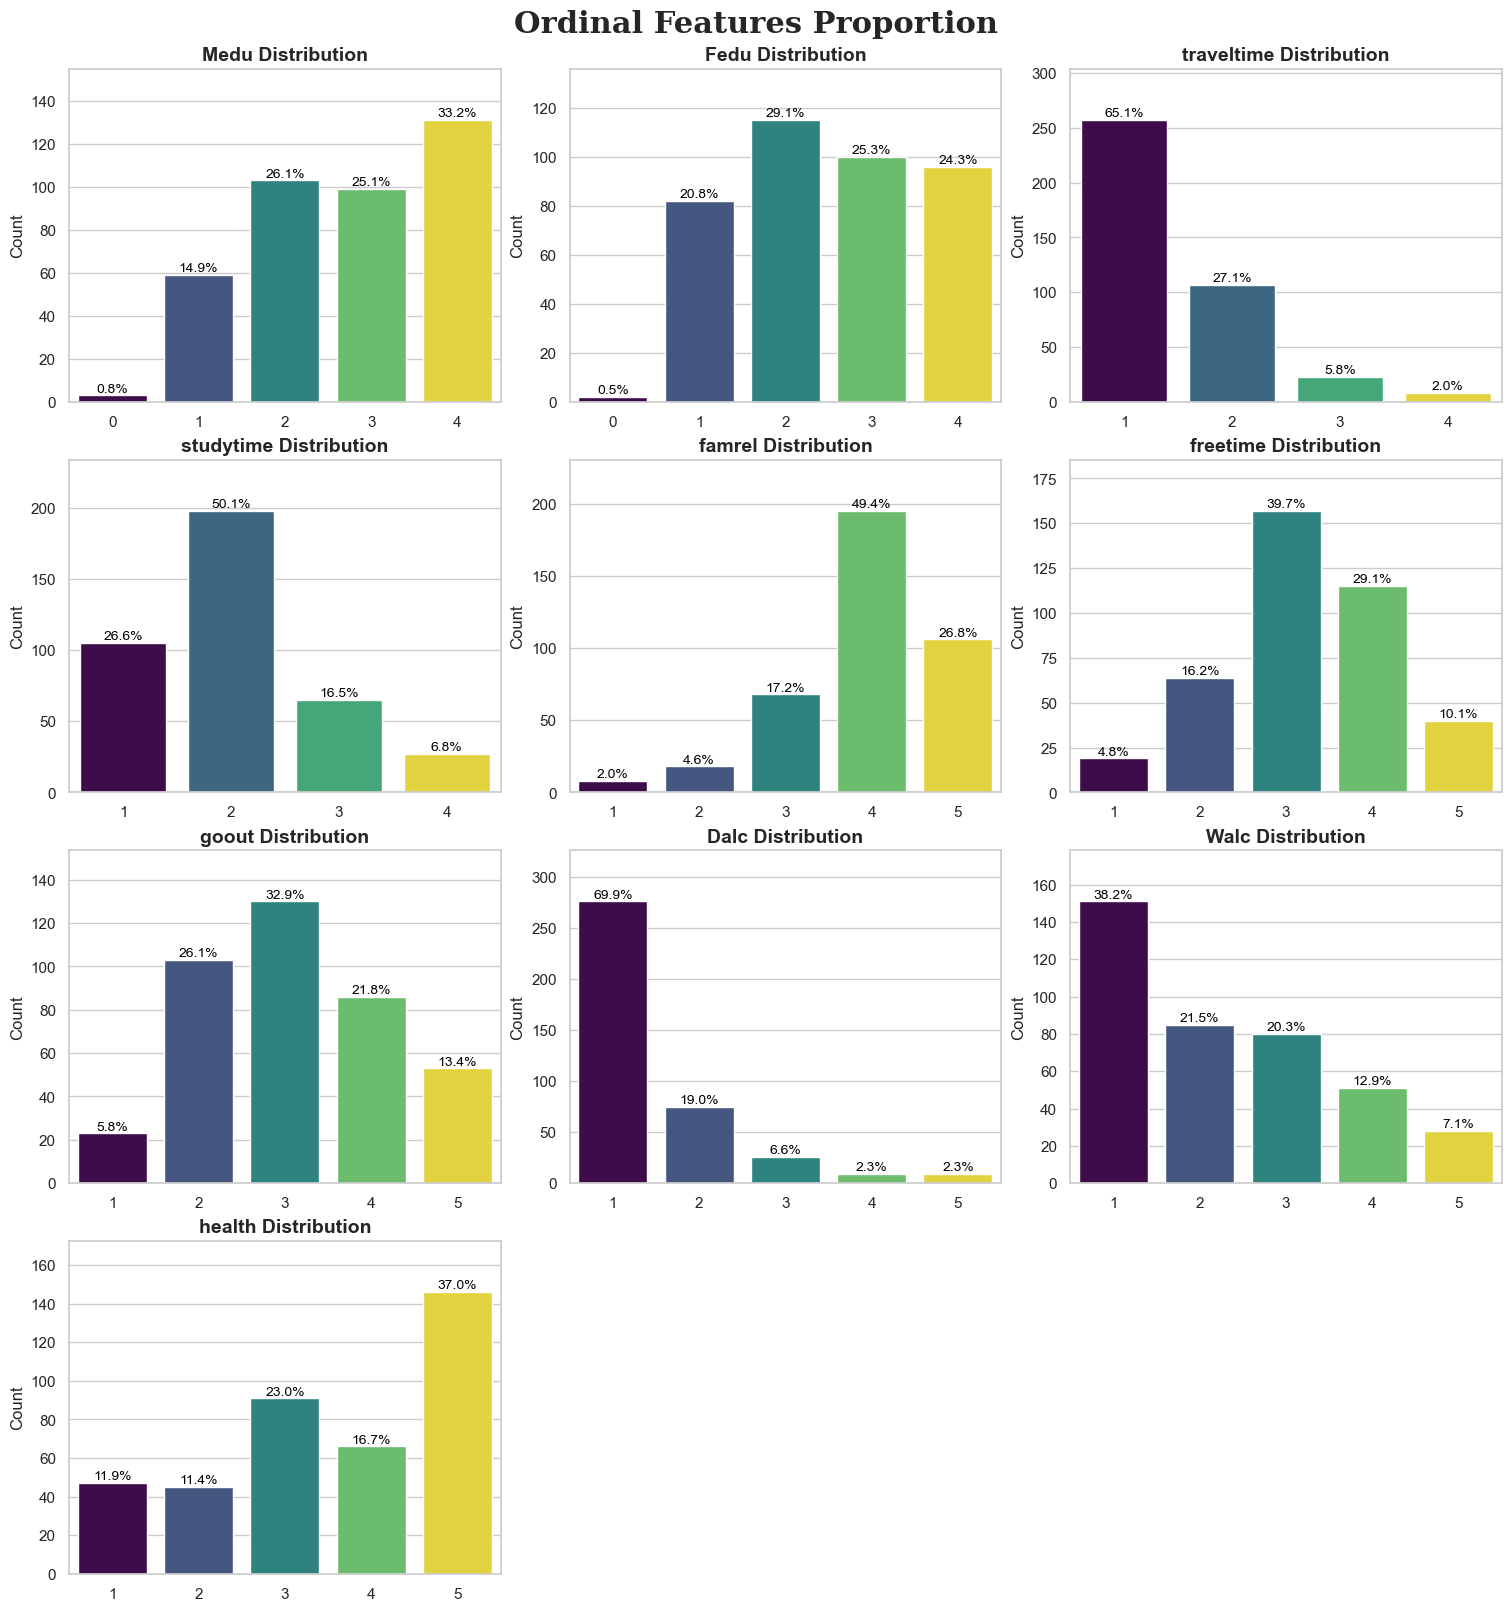

In [44]:
bar_matrix(mat_df,num_columns,annot=True,title='Ordinal Features Proportion')

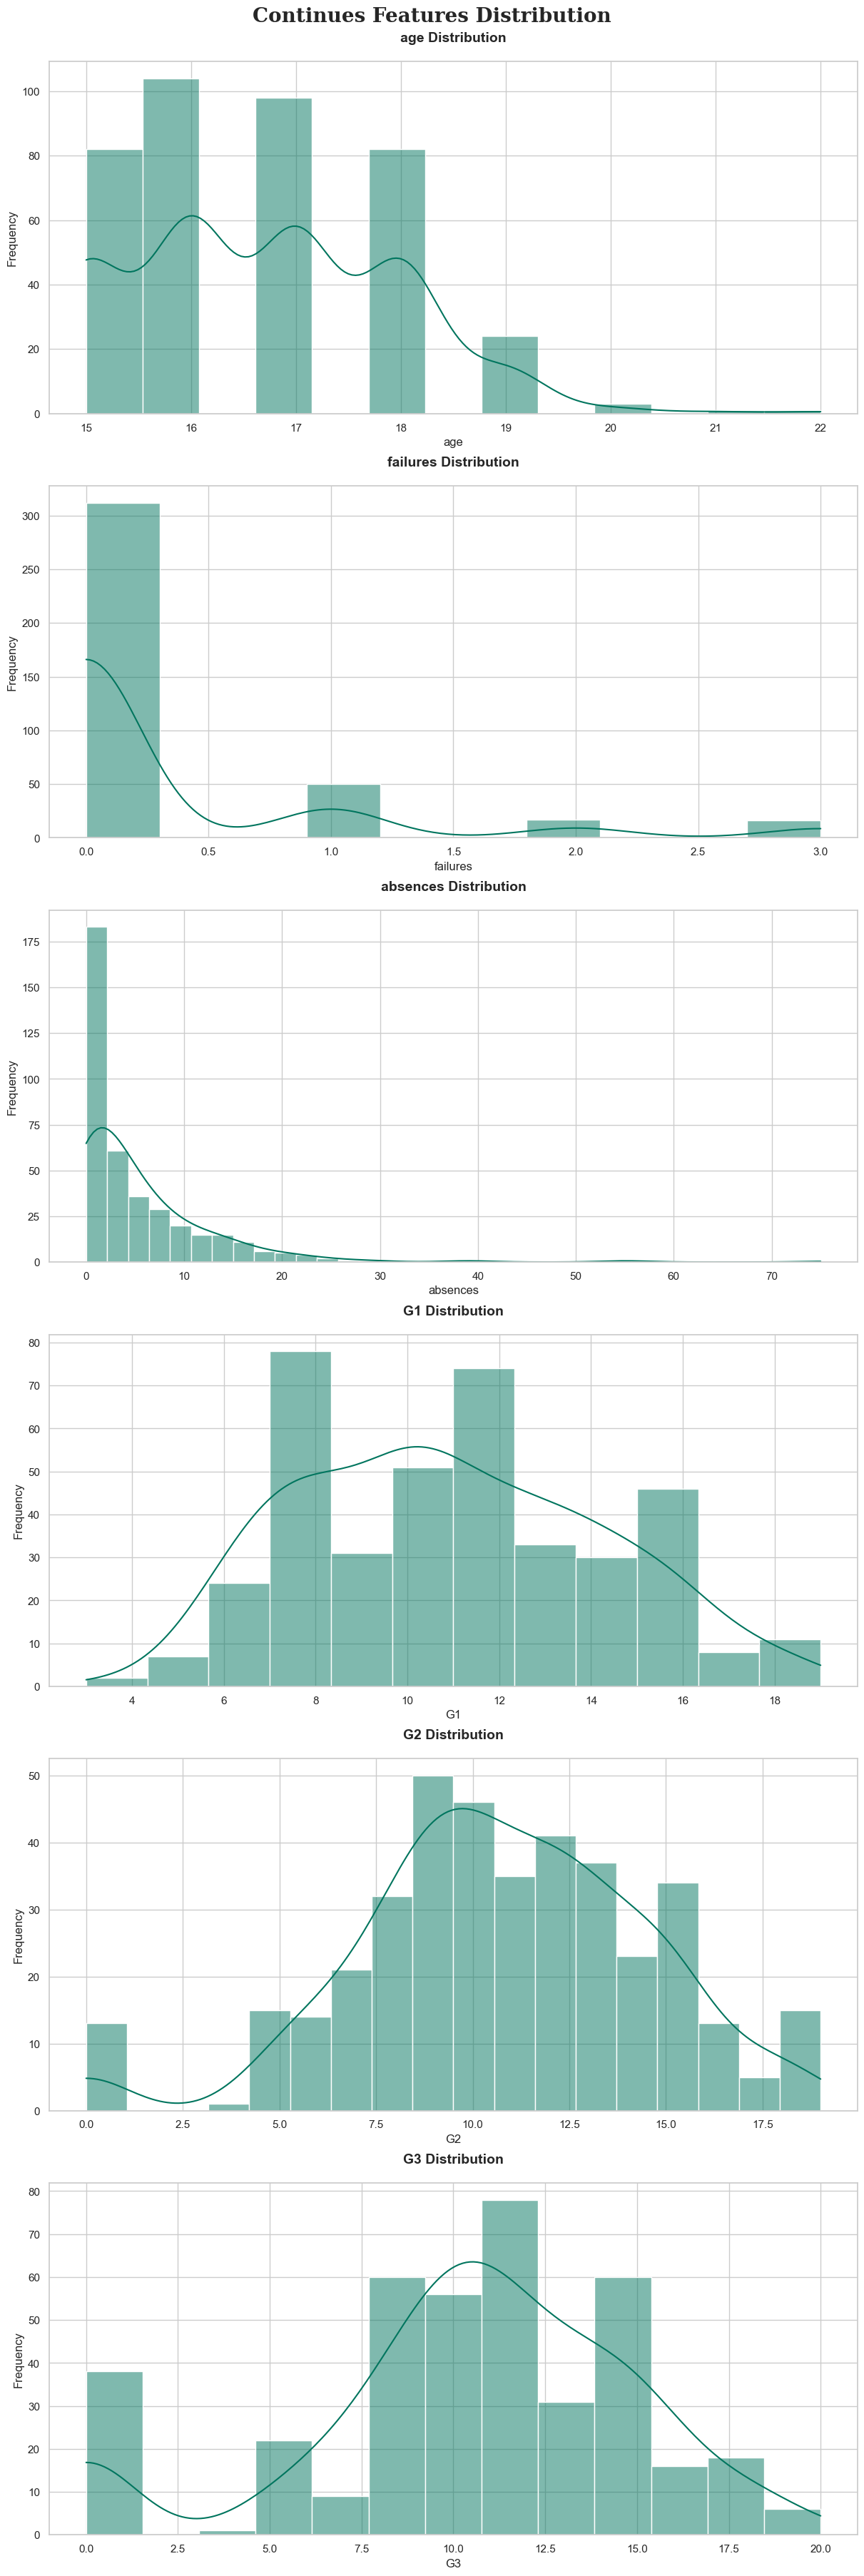

In [45]:
hist_bar(mat_df,cont_columns,title='Continues Features Distribution')

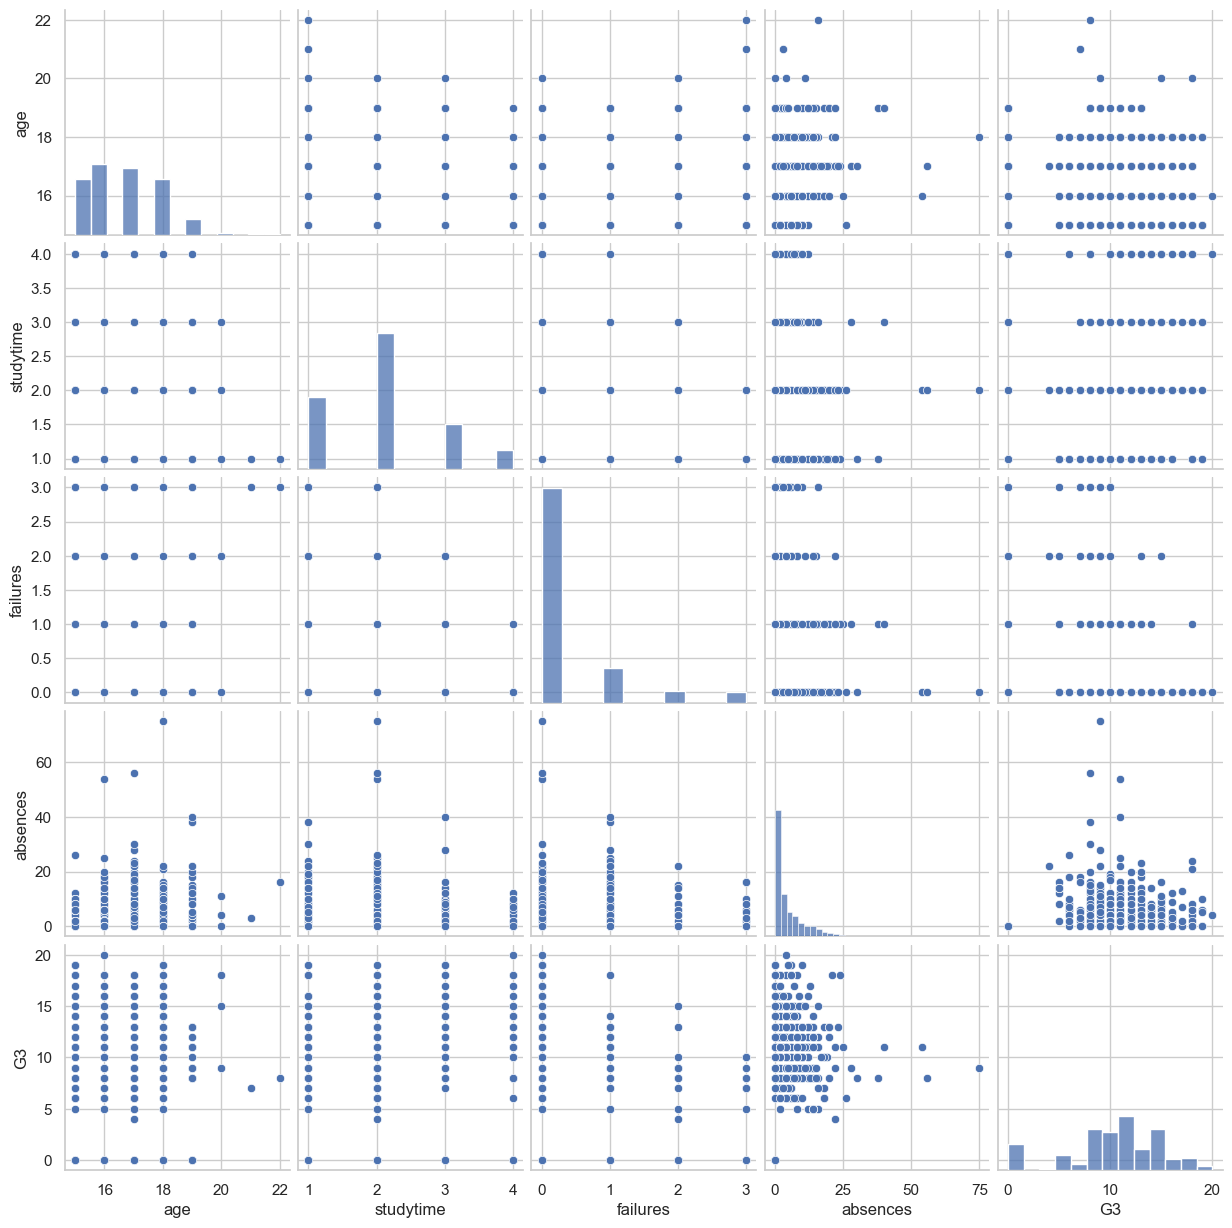

In [46]:
# Pairplot to see relationships
sns.pairplot(mat_df, vars=['age', 'studytime', 'failures', 'absences', 'G3'])
plt.show()

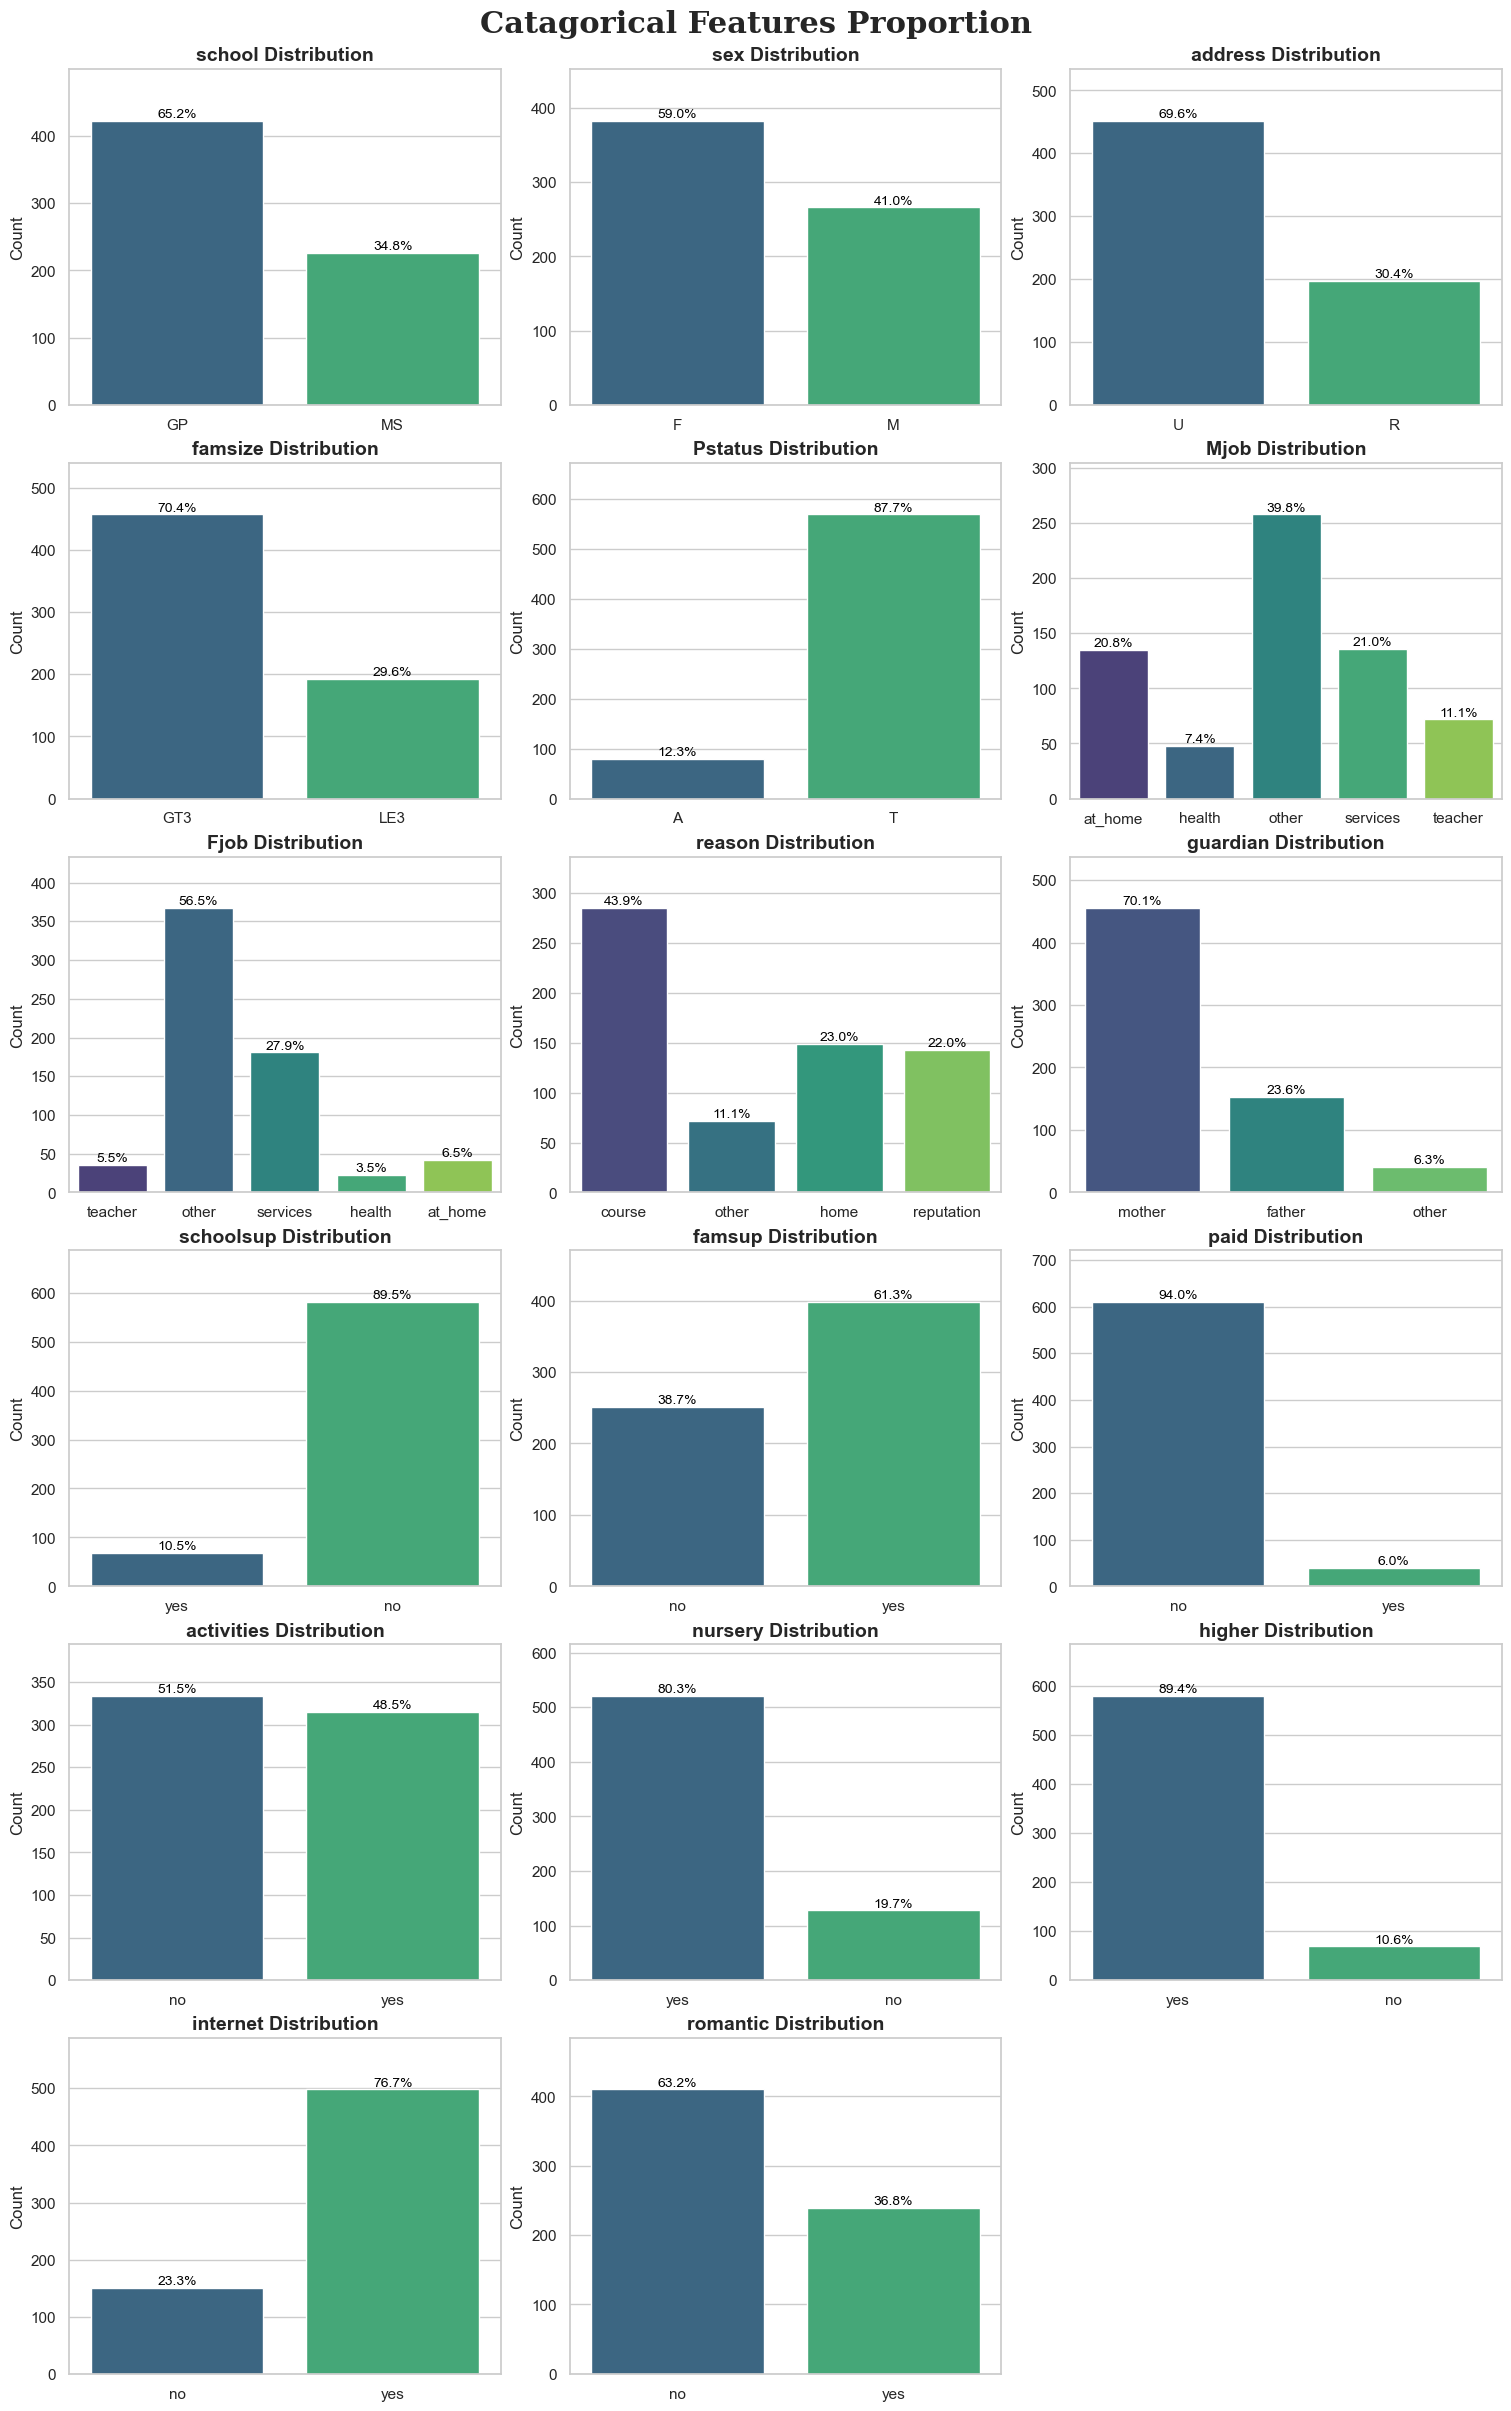

In [47]:
bar_matrix(por_df,cat_columns,annot=True,title='Catagorical Features Proportion')

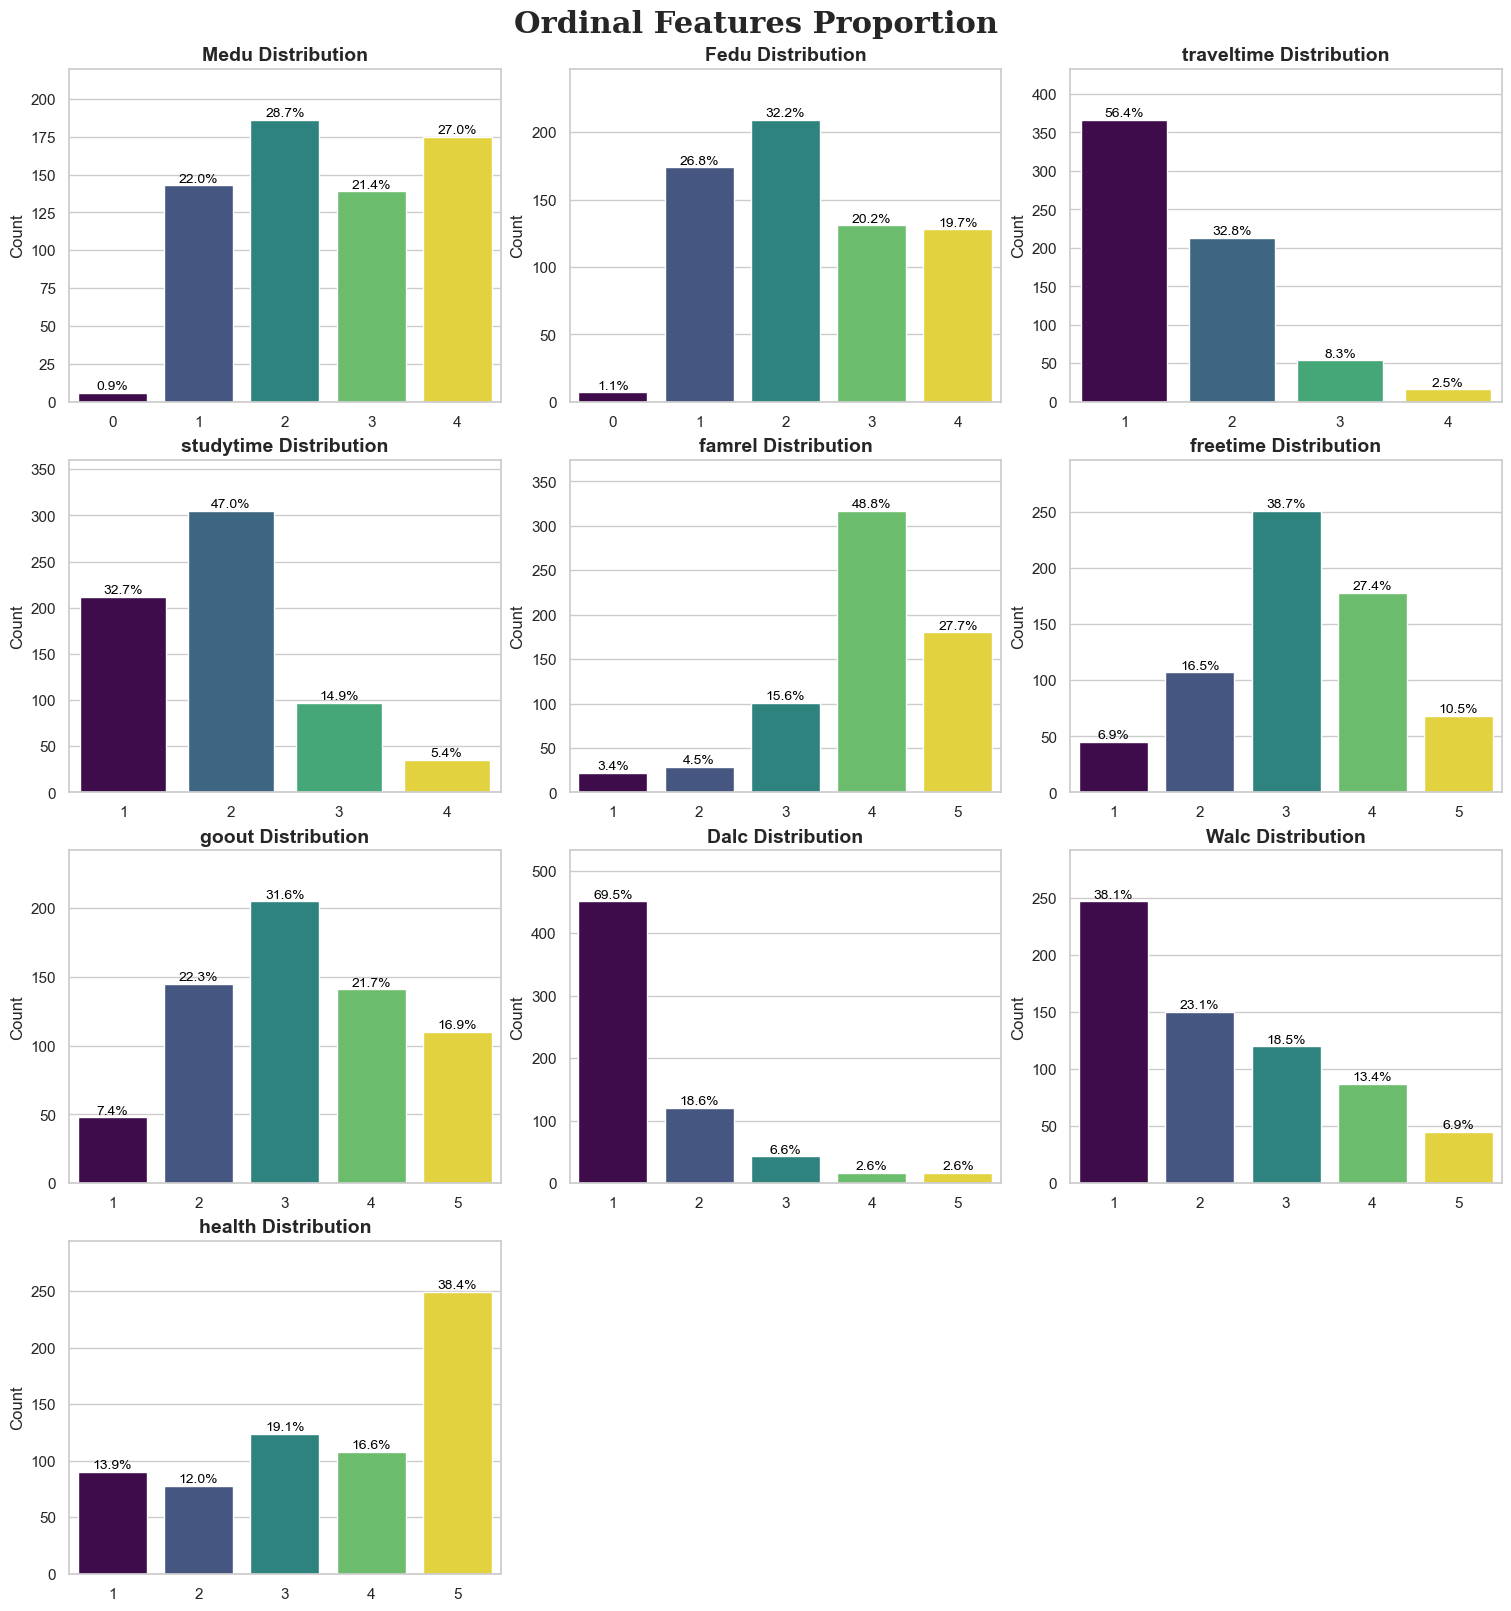

In [48]:
bar_matrix(por_df,num_columns,annot=True,title='Ordinal Features Proportion')

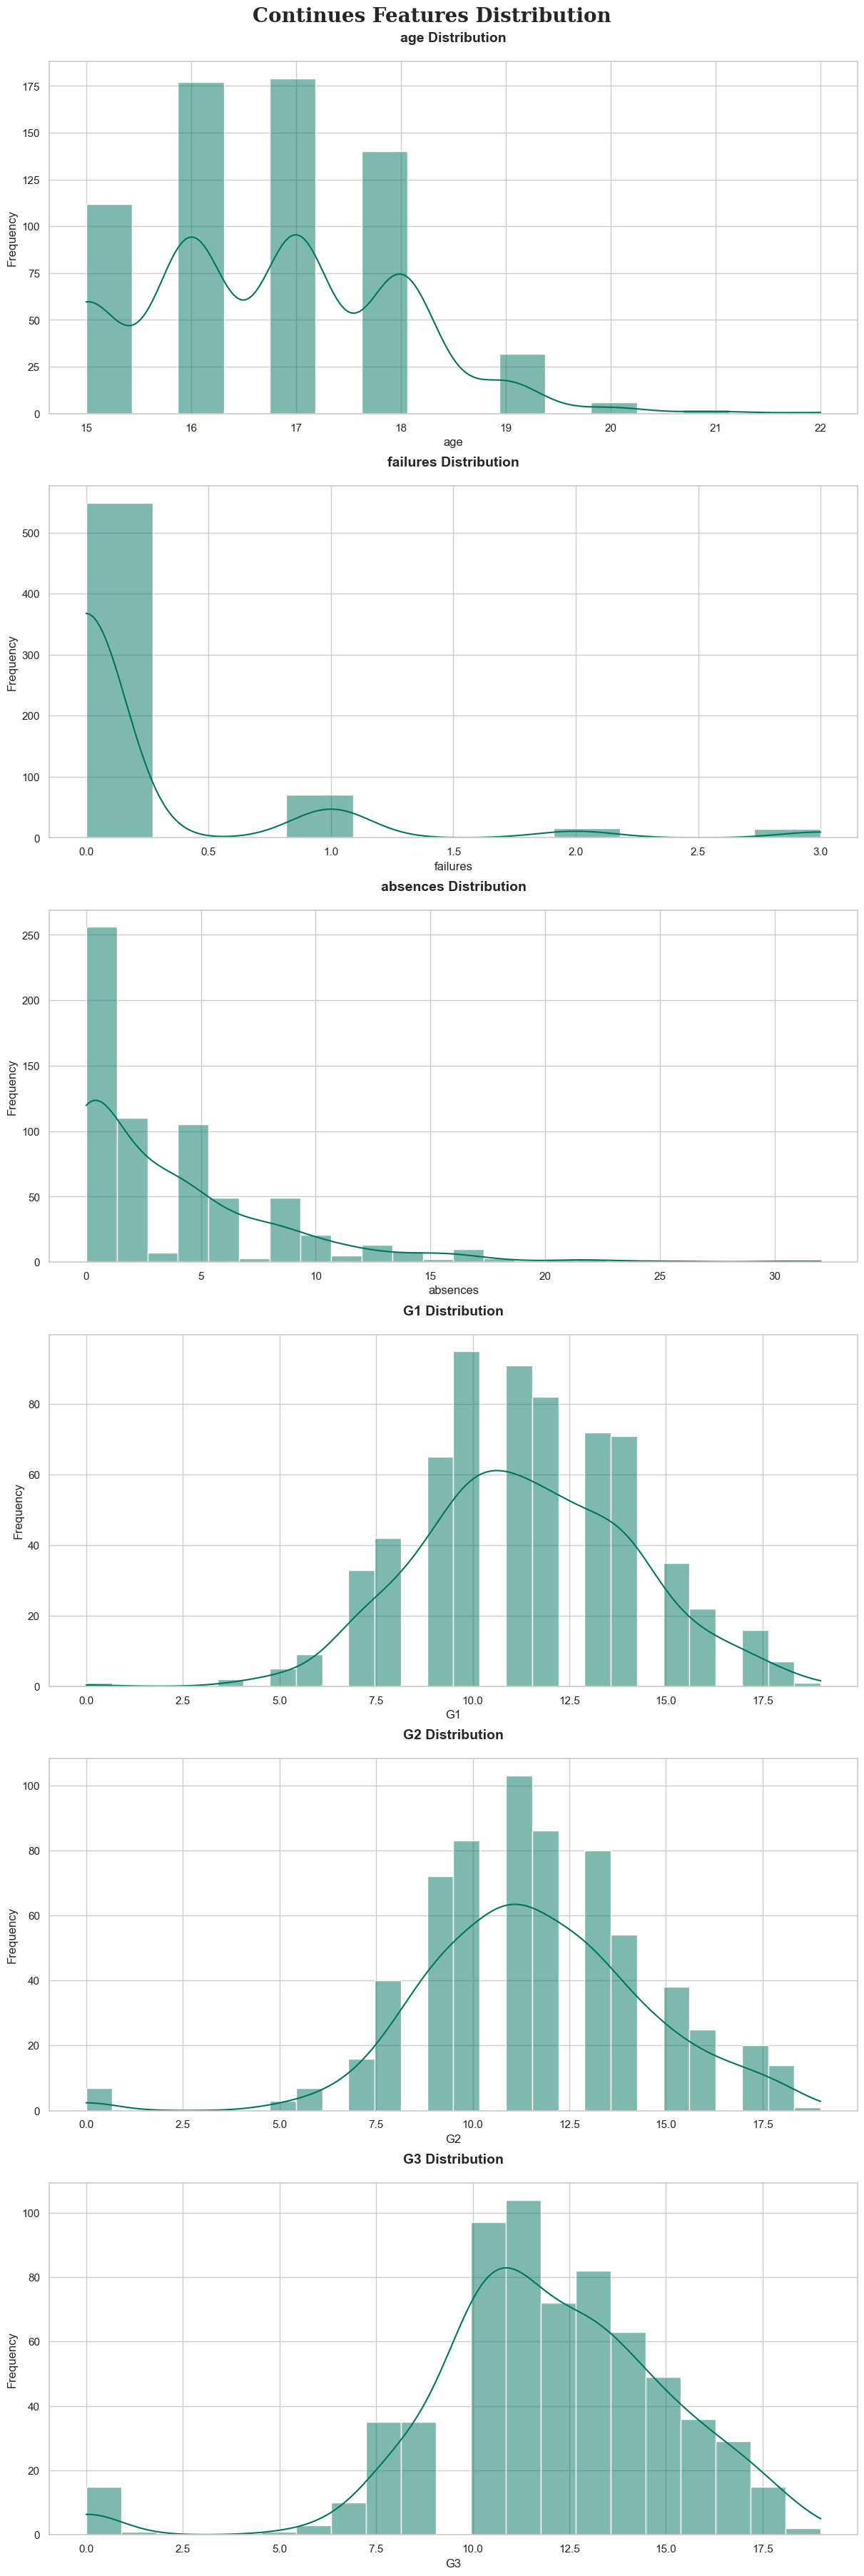

In [49]:
hist_bar(por_df,cont_columns,title='Continues Features Distribution')

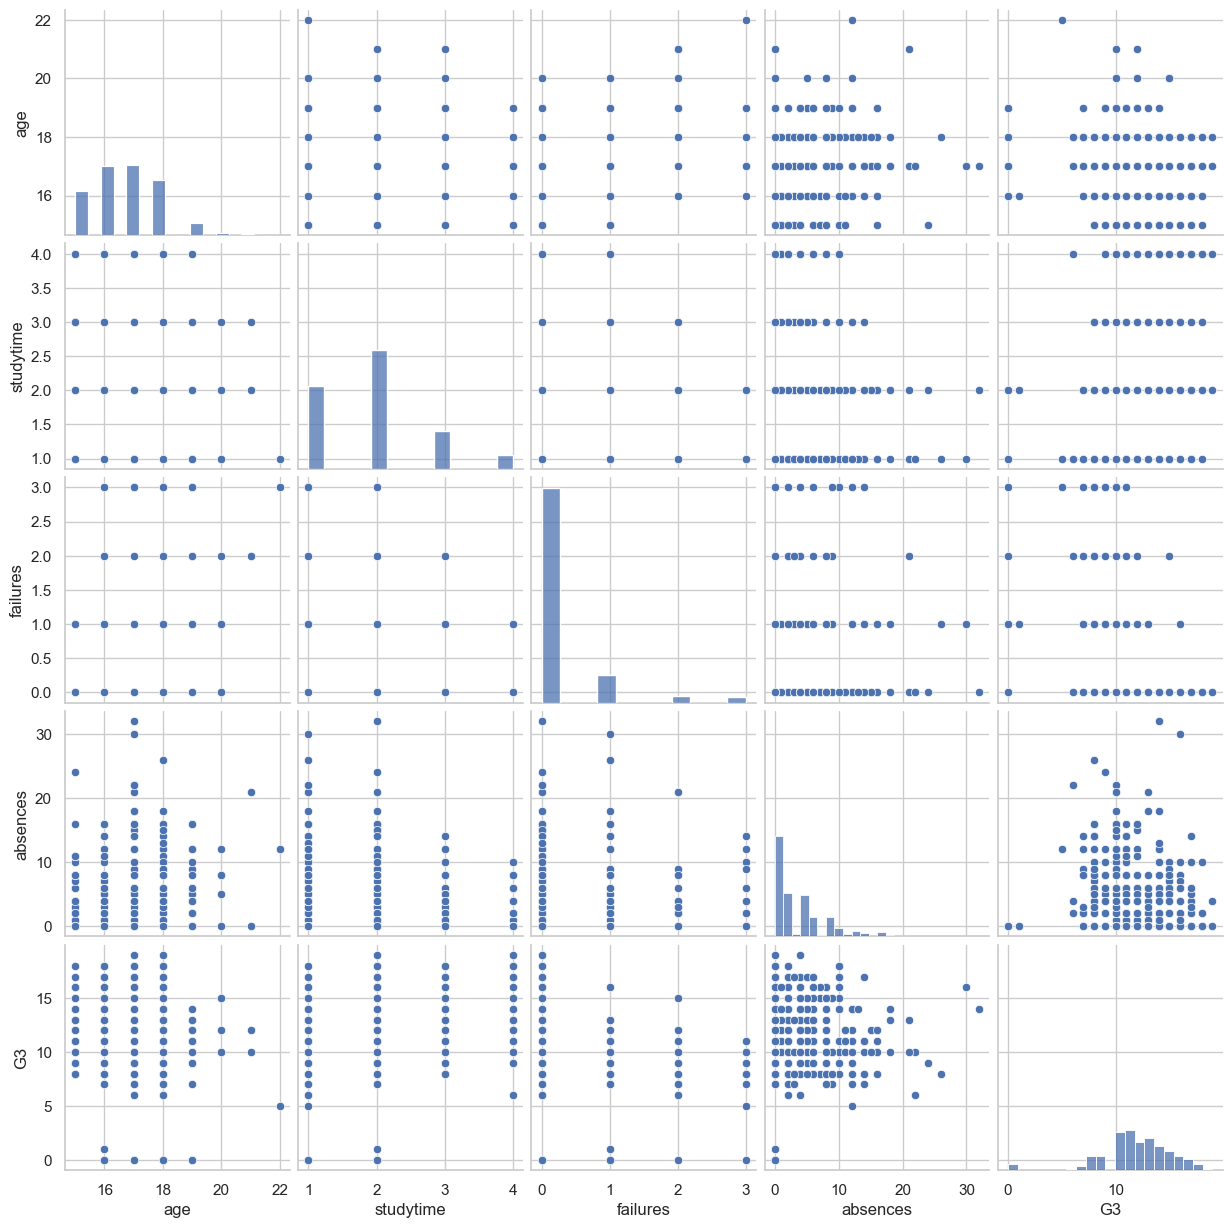

In [50]:
# Pairplot to see relationships
sns.pairplot(por_df, vars=['age', 'studytime', 'failures', 'absences', 'G3'])
plt.show()